# Credit Card Fraud Detection - Data Exploration

**Author:** Your Name  
**Date:** December 2025  
**Dataset:** Kaggle Credit Card Fraud Detection (284,807 transactions)

---

## Objectives
1. Load and understand the dataset structure
2. Analyze class distribution (fraud vs. normal)
3. Explore key features: Time, Amount, and PCA components (V1-V28)
4. Visualize patterns and correlations
5. Identify characteristics of fraudulent transactions

---

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set figure resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Create results directory
Path('../results').mkdir(parents=True, exist_ok=True)

print("✓ Libraries imported successfully")
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Pandas version: {pd.__version__}")

✓ Libraries imported successfully
✓ NumPy version: 1.26.4
✓ Pandas version: 2.3.3


---
## 1. Load Dataset

In [2]:
# Load the dataset
data_path = '../data/creditcard.csv'

print("Loading dataset...")
df = pd.read_csv(data_path)

print(f"✓ Dataset loaded successfully")
print(f"\nDataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading dataset...
✓ Dataset loaded successfully

Dataset shape: (284807, 31)
Memory usage: 67.36 MB


---
## 2. Basic Dataset Information

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [5]:
# Check for missing values
print("Missing values per column:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    print(missing[missing > 0])

Missing values per column:
✓ No missing values found!


In [6]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


---
## 3. Class Distribution Analysis

In [7]:
# Class distribution
class_counts = df['Class'].value_counts()
fraud_percentage = (class_counts[1] / len(df)) * 100

print("="*60)
print("CLASS DISTRIBUTION")
print("="*60)
print(f"Normal transactions (Class 0): {class_counts[0]:,} ({100-fraud_percentage:.3f}%)")
print(f"Fraud transactions (Class 1):  {class_counts[1]:,} ({fraud_percentage:.3f}%)")
print(f"\nImbalance Ratio: 1:{class_counts[0]/class_counts[1]:.0f}")
print(f"This is a HIGHLY IMBALANCED dataset!")
print("="*60)

CLASS DISTRIBUTION
Normal transactions (Class 0): 284,315 (99.827%)
Fraud transactions (Class 1):  492 (0.173%)

Imbalance Ratio: 1:578
This is a HIGHLY IMBALANCED dataset!


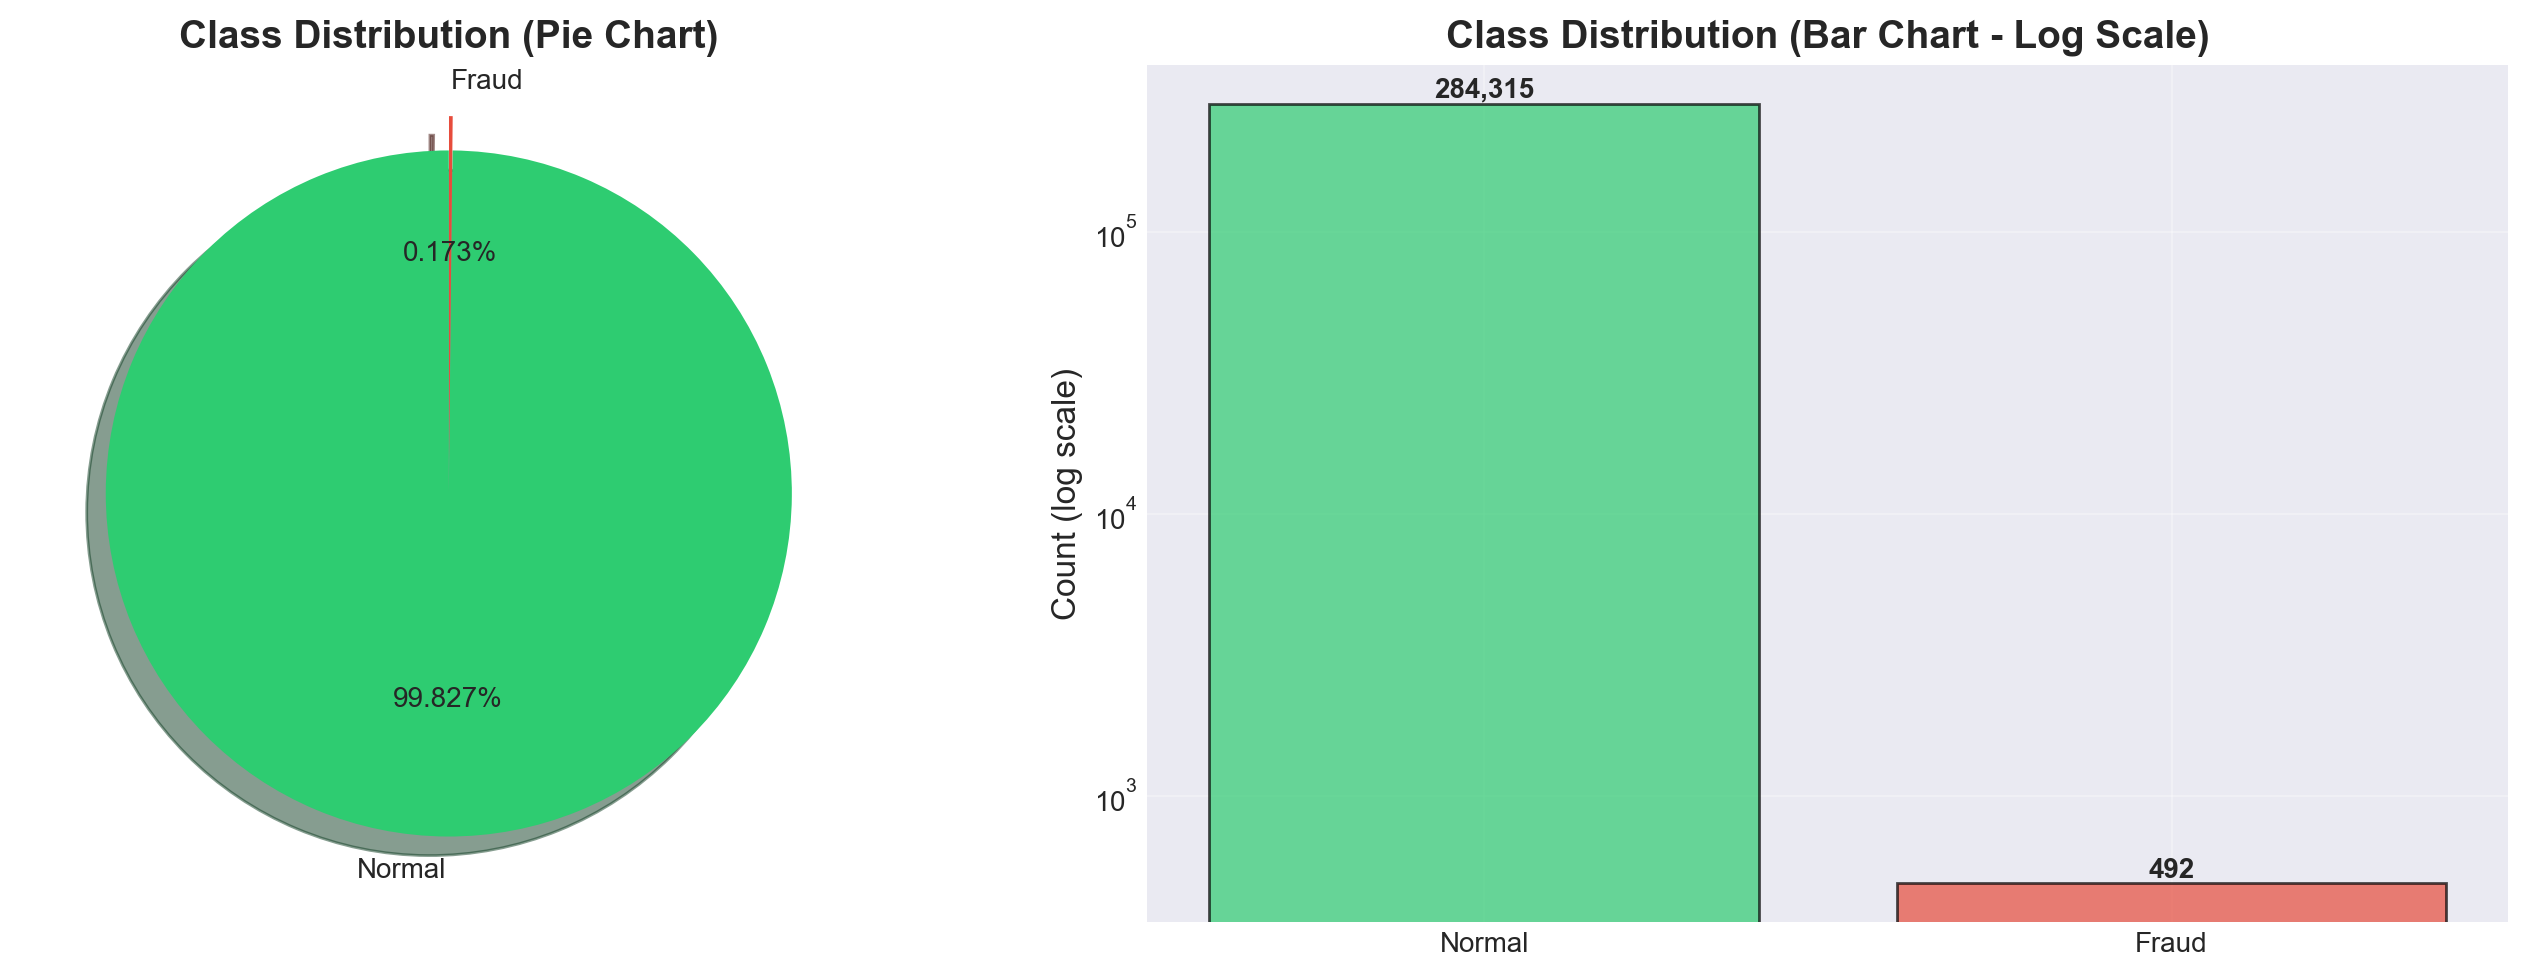

✓ Saved: results/class_distribution_2.png


In [ ]:
# Visualize class distribution with pie chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.1)  # Explode fraud slice
axes[0].pie(class_counts, labels=['Normal', 'Fraud'], autopct='%1.3f%%',
            startangle=90, colors=colors, explode=explode, shadow=True)
axes[0].set_title('Class Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart with log scale
axes[1].bar(['Normal', 'Fraud'], class_counts, color=colors, edgecolor='black', alpha=0.7)
axes[1].set_yscale('log')
axes[1].set_ylabel('Count (log scale)', fontsize=12)
axes[1].set_title('Class Distribution (Bar Chart - Log Scale)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add count labels on bars
for i, count in enumerate(class_counts):
    axes[1].text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: results/class_distribution.png")

---
## 4. Time Feature Analysis

In [9]:
# Analyze Time feature
print("Time Feature Statistics:")
print(f"Min: {df['Time'].min():.0f} seconds")
print(f"Max: {df['Time'].max():.0f} seconds ({df['Time'].max()/3600:.1f} hours)")
print(f"Mean: {df['Time'].mean():.0f} seconds")
print(f"\nDataset covers approximately {df['Time'].max()/3600/24:.1f} days of transactions")

Time Feature Statistics:
Min: 0 seconds
Max: 172792 seconds (48.0 hours)
Mean: 94814 seconds

Dataset covers approximately 2.0 days of transactions


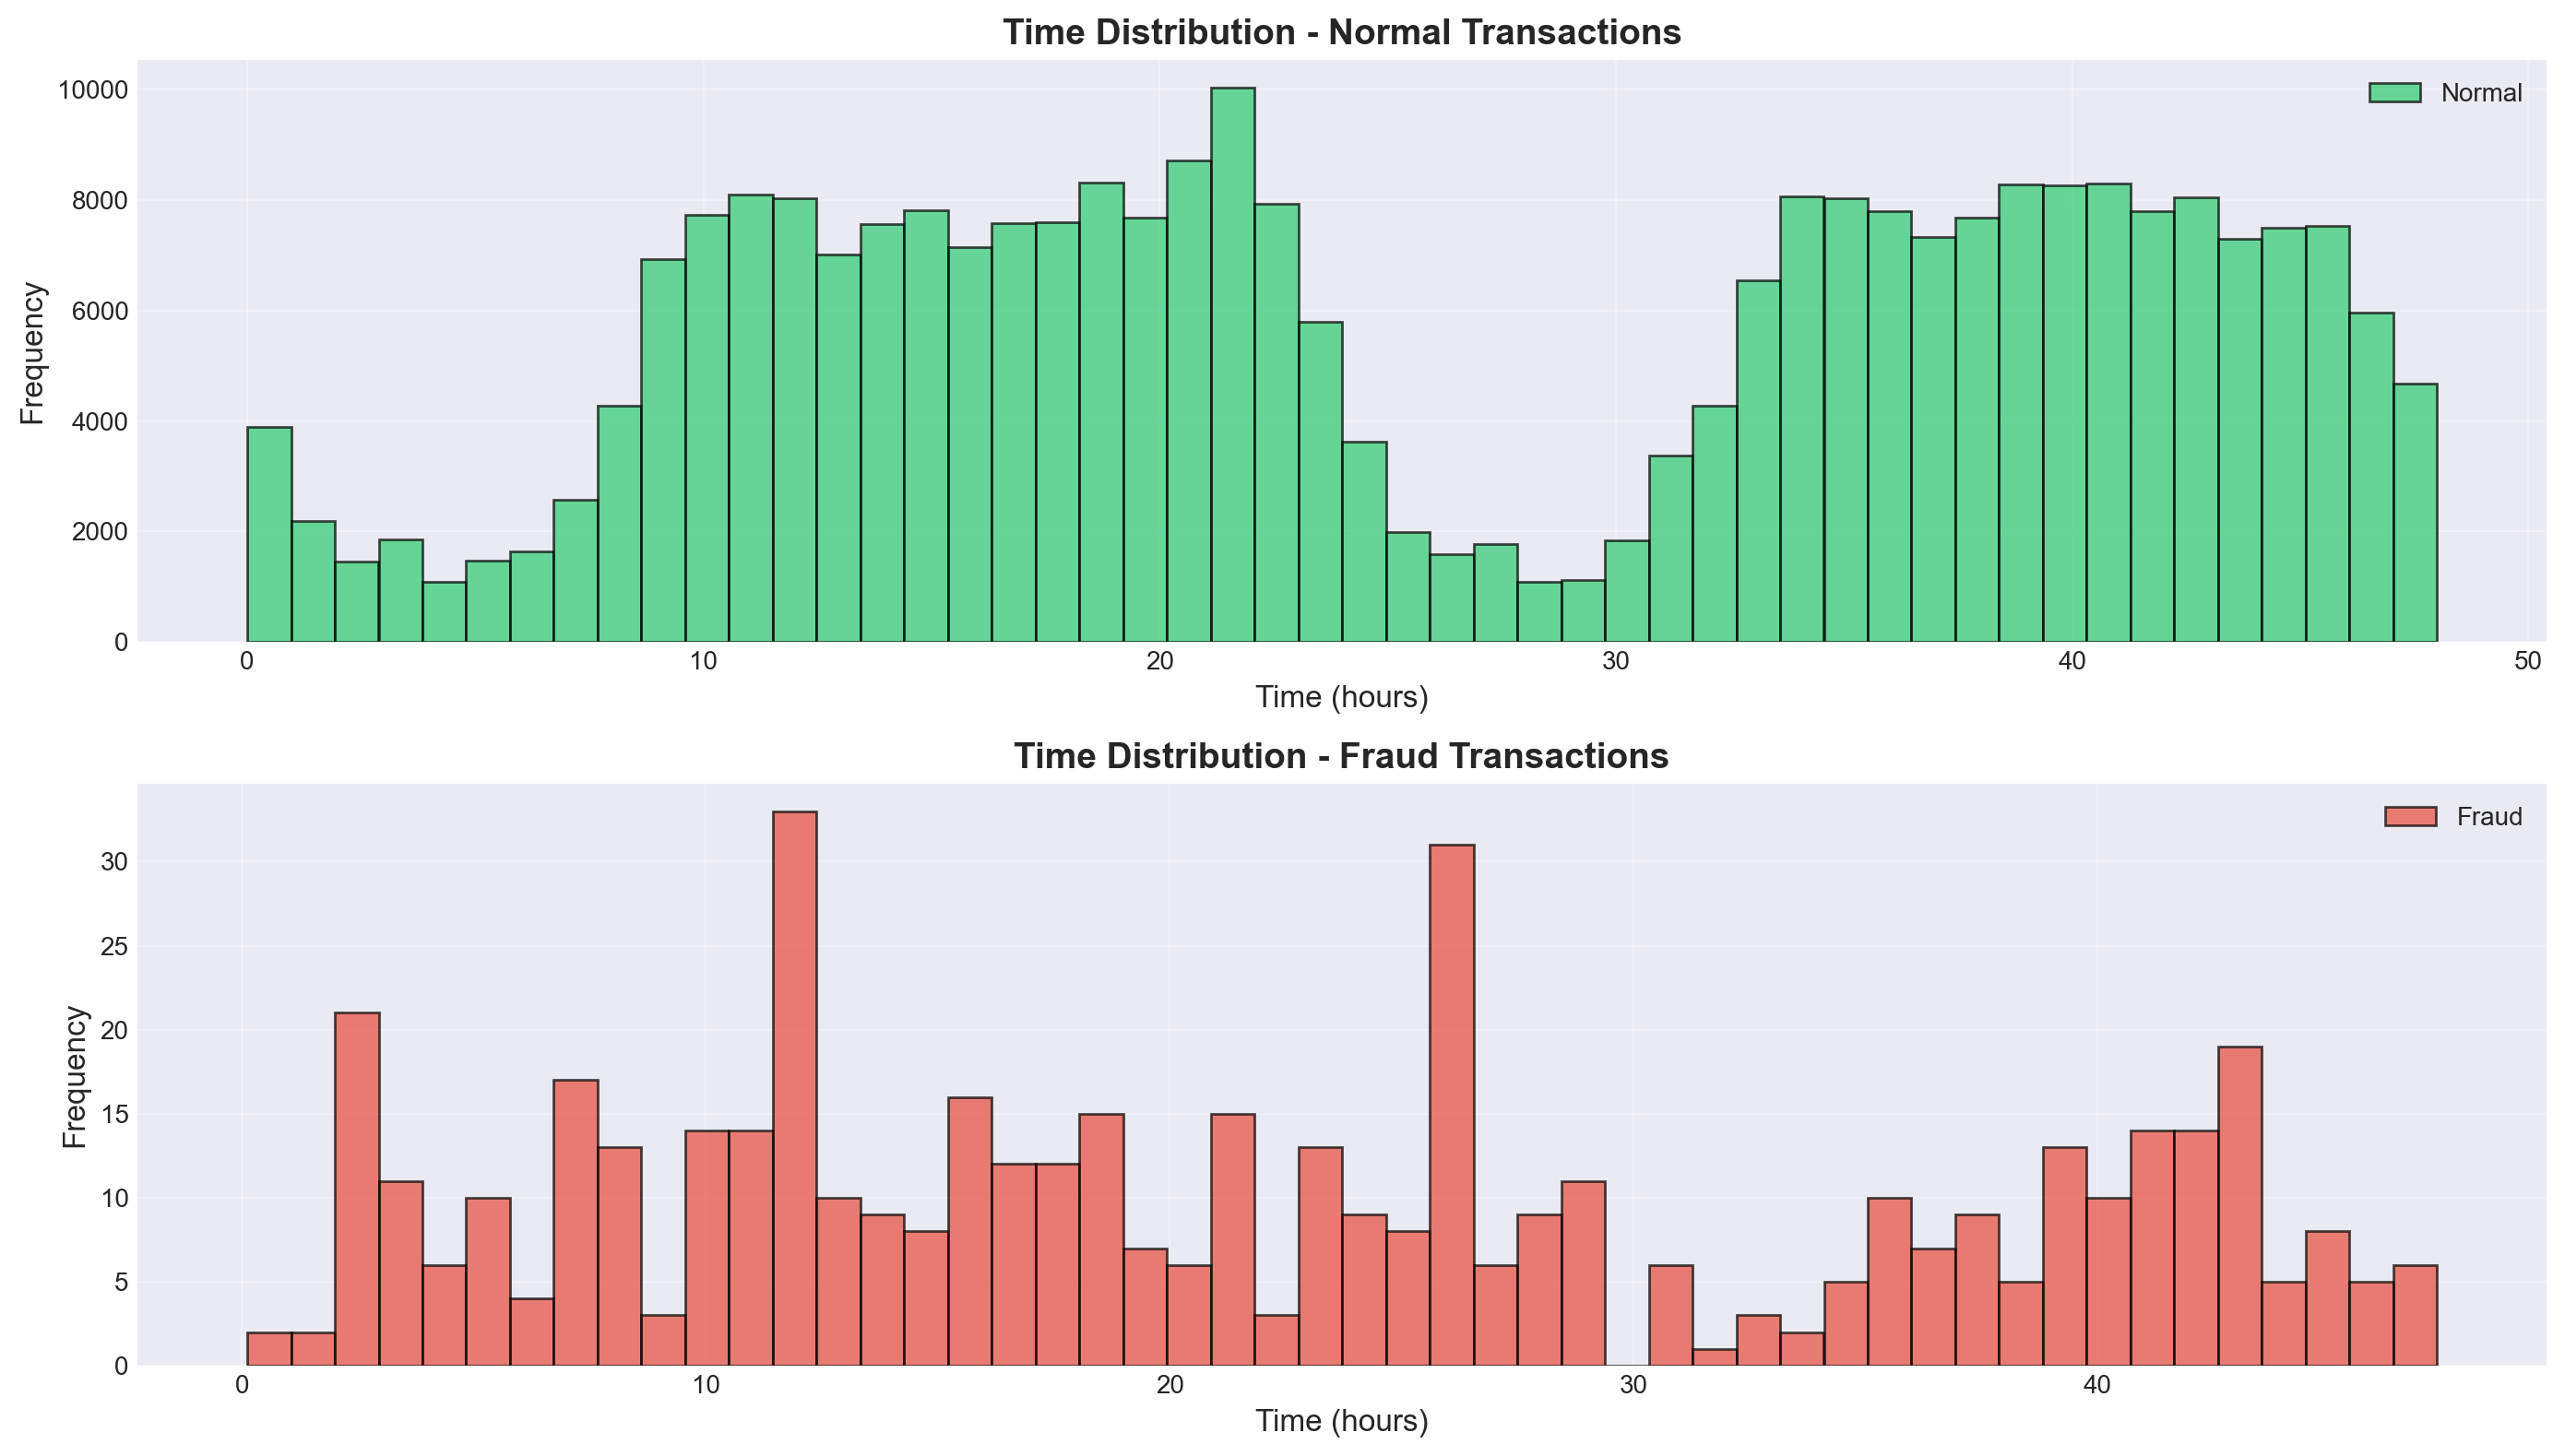

✓ Saved: results/time_distribution_2.png


In [ ]:
# Visualize Time distribution for fraud vs normal
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Convert Time to hours
df['Time_hours'] = df['Time'] / 3600

# Histogram for normal transactions
axes[0].hist(df[df['Class'] == 0]['Time_hours'], bins=50, color='#2ecc71', 
             alpha=0.7, edgecolor='black', label='Normal')
axes[0].set_xlabel('Time (hours)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Time Distribution - Normal Transactions', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histogram for fraud transactions
axes[1].hist(df[df['Class'] == 1]['Time_hours'], bins=50, color='#e74c3c', 
             alpha=0.7, edgecolor='black', label='Fraud')
axes[1].set_xlabel('Time (hours)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Time Distribution - Fraud Transactions', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: results/time_distribution.png")

---
## 5. Amount Feature Analysis

In [11]:
# Analyze Amount feature
print("Amount Feature Statistics:")
print("\nOverall:")
print(df['Amount'].describe())

print("\nNormal Transactions:")
print(df[df['Class'] == 0]['Amount'].describe())

print("\nFraud Transactions:")
print(df[df['Class'] == 1]['Amount'].describe())

Amount Feature Statistics:

Overall:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Normal Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraud Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


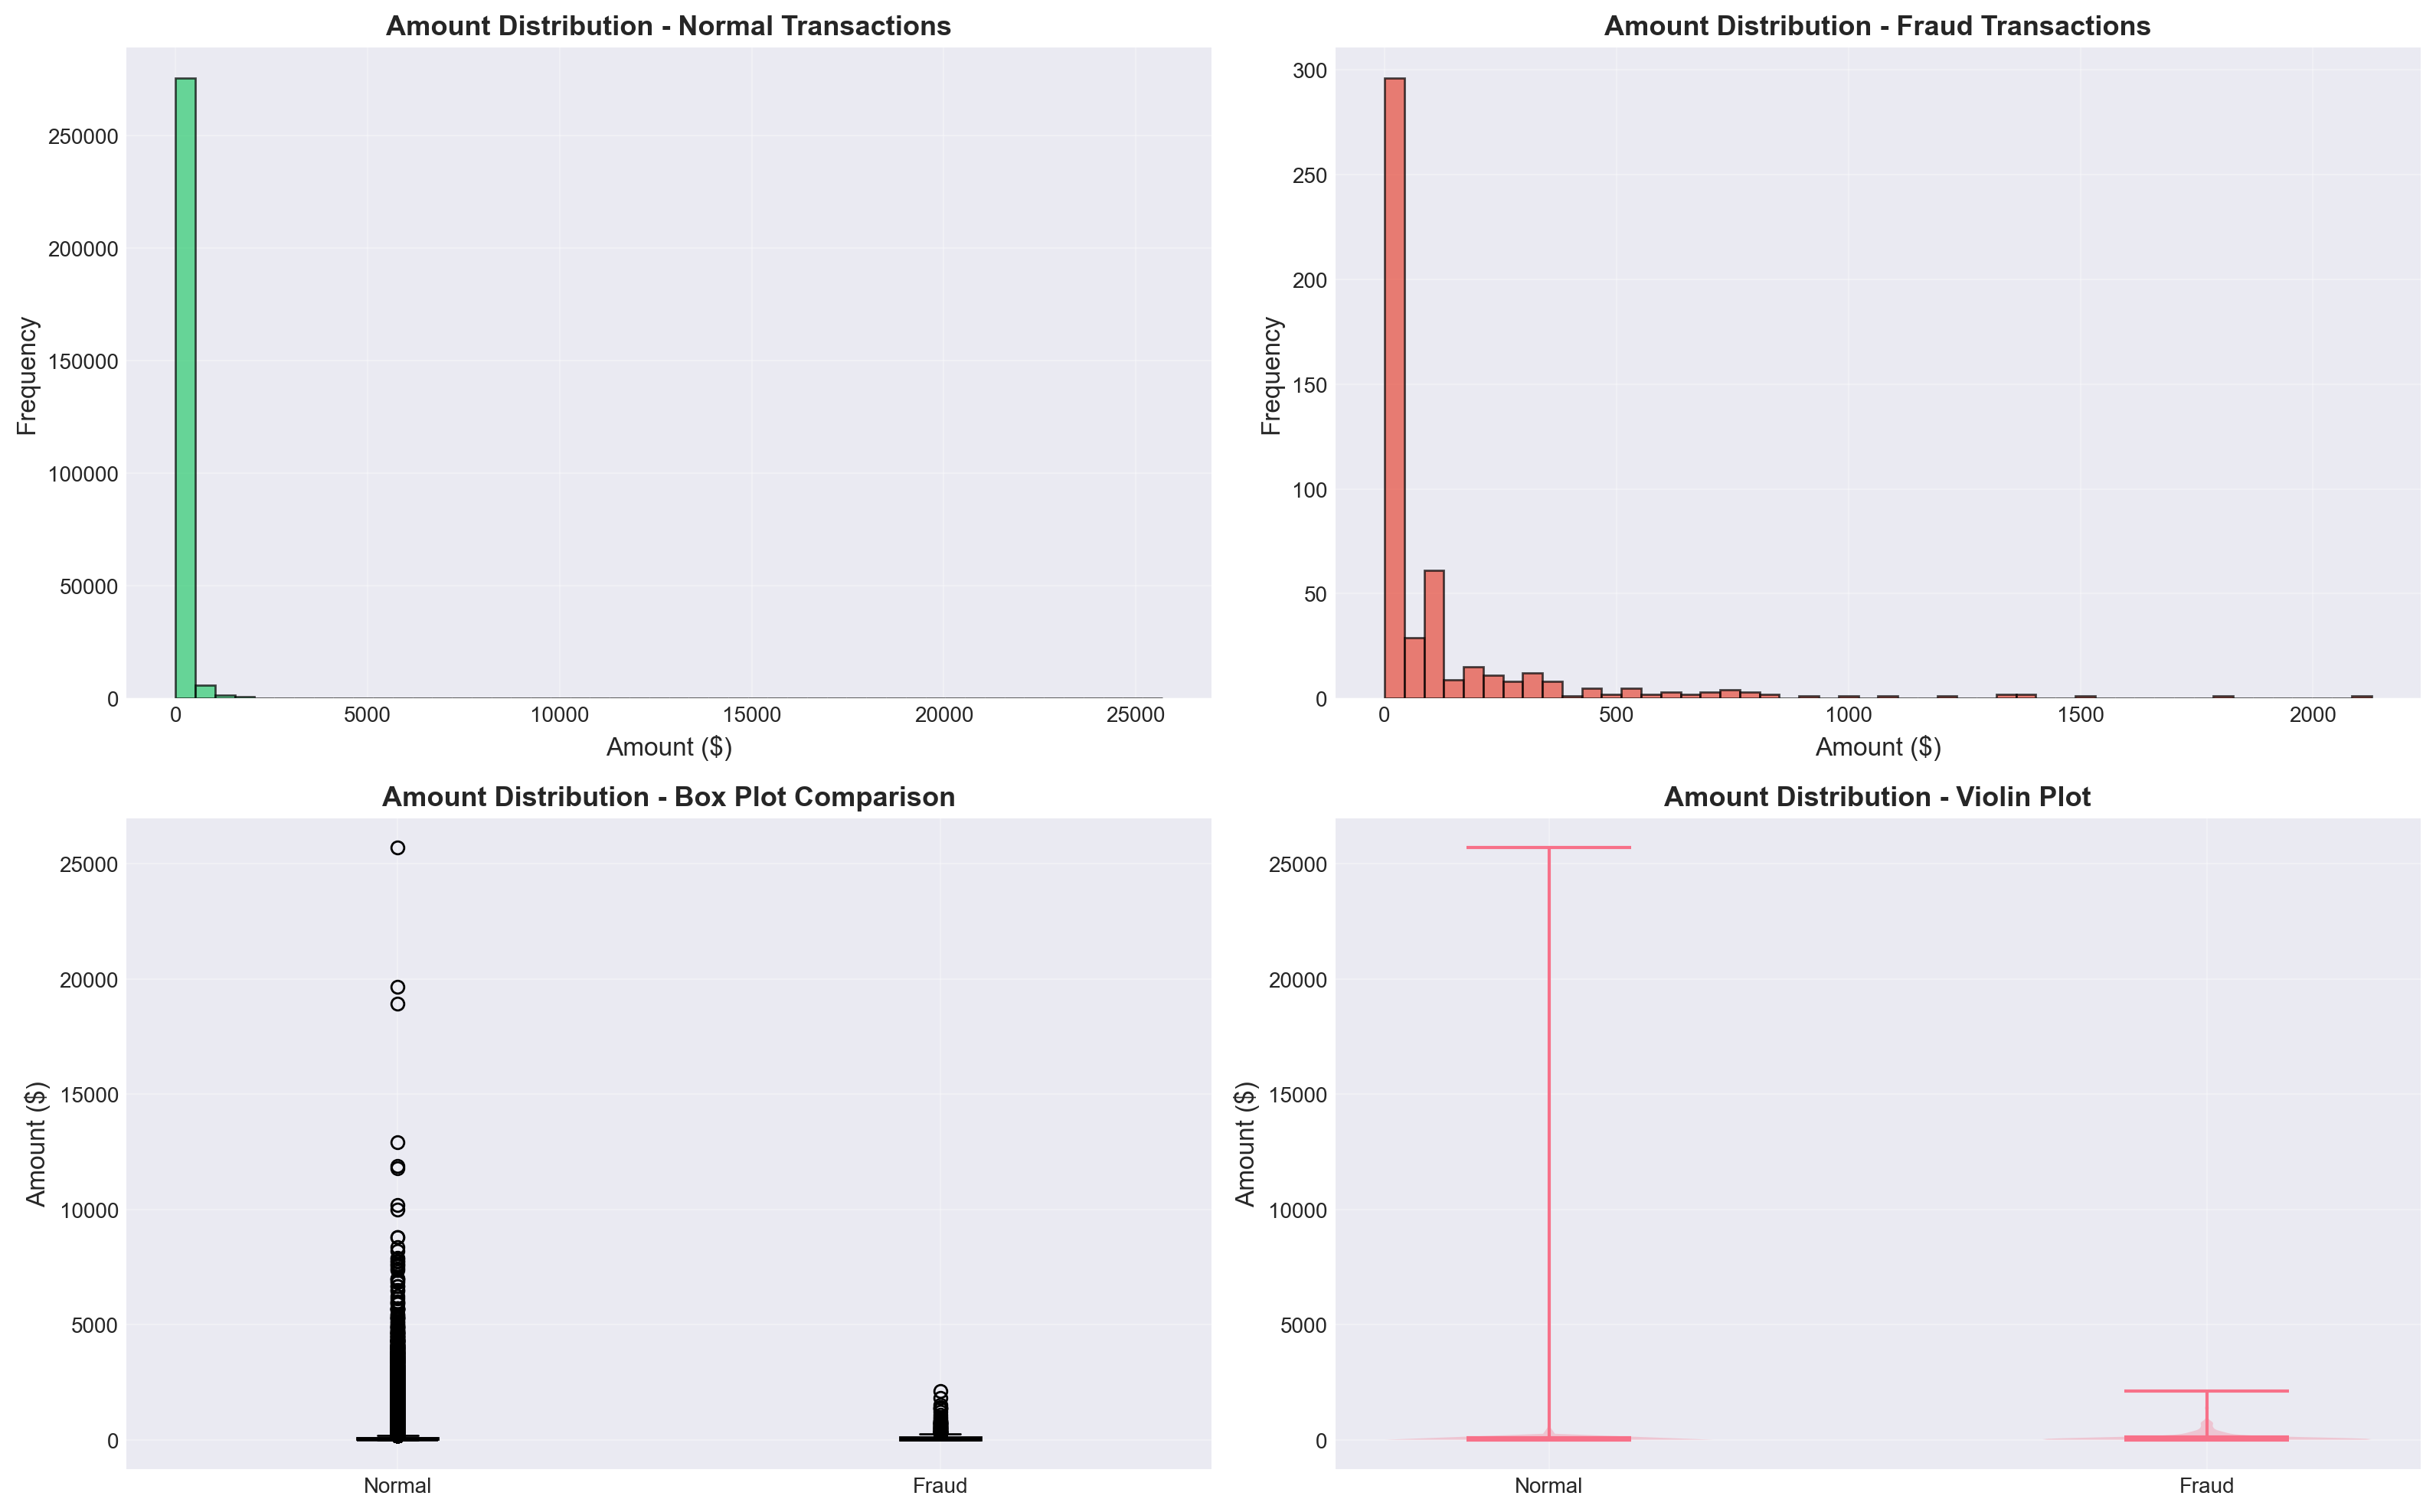

✓ Saved: results/amount_distribution_2.png


In [ ]:
# Visualize Amount distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogram - Normal
axes[0, 0].hist(df[df['Class'] == 0]['Amount'], bins=50, color='#2ecc71', 
                alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Amount ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Amount Distribution - Normal Transactions', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Histogram - Fraud
axes[0, 1].hist(df[df['Class'] == 1]['Amount'], bins=50, color='#e74c3c', 
                alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Amount ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Amount Distribution - Fraud Transactions', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Box plot comparison
data_to_plot = [df[df['Class'] == 0]['Amount'], df[df['Class'] == 1]['Amount']]
bp = axes[1, 0].boxplot(data_to_plot, labels=['Normal', 'Fraud'], patch_artist=True,
                        medianprops=dict(color='black', linewidth=2))
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
axes[1, 0].set_ylabel('Amount ($)', fontsize=12)
axes[1, 0].set_title('Amount Distribution - Box Plot Comparison', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Violin plot
parts = axes[1, 1].violinplot(data_to_plot, positions=[1, 2], showmeans=True, showmedians=True)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Normal', 'Fraud'])
axes[1, 1].set_ylabel('Amount ($)', fontsize=12)
axes[1, 1].set_title('Amount Distribution - Violin Plot', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/amount_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: results/amount_distribution.png")

---
## 6. Correlation Analysis

In [13]:
# Calculate correlation with target variable
correlations = df.corr()['Class'].sort_values(ascending=False)
print("Top 10 features most correlated with Fraud (Class):")
print(correlations.head(11))  # 11 to include Class itself

print("\nTop 10 features most negatively correlated with Fraud:")
print(correlations.tail(10))

Top 10 features most correlated with Fraud (Class):
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 features most negatively correlated with Fraud:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


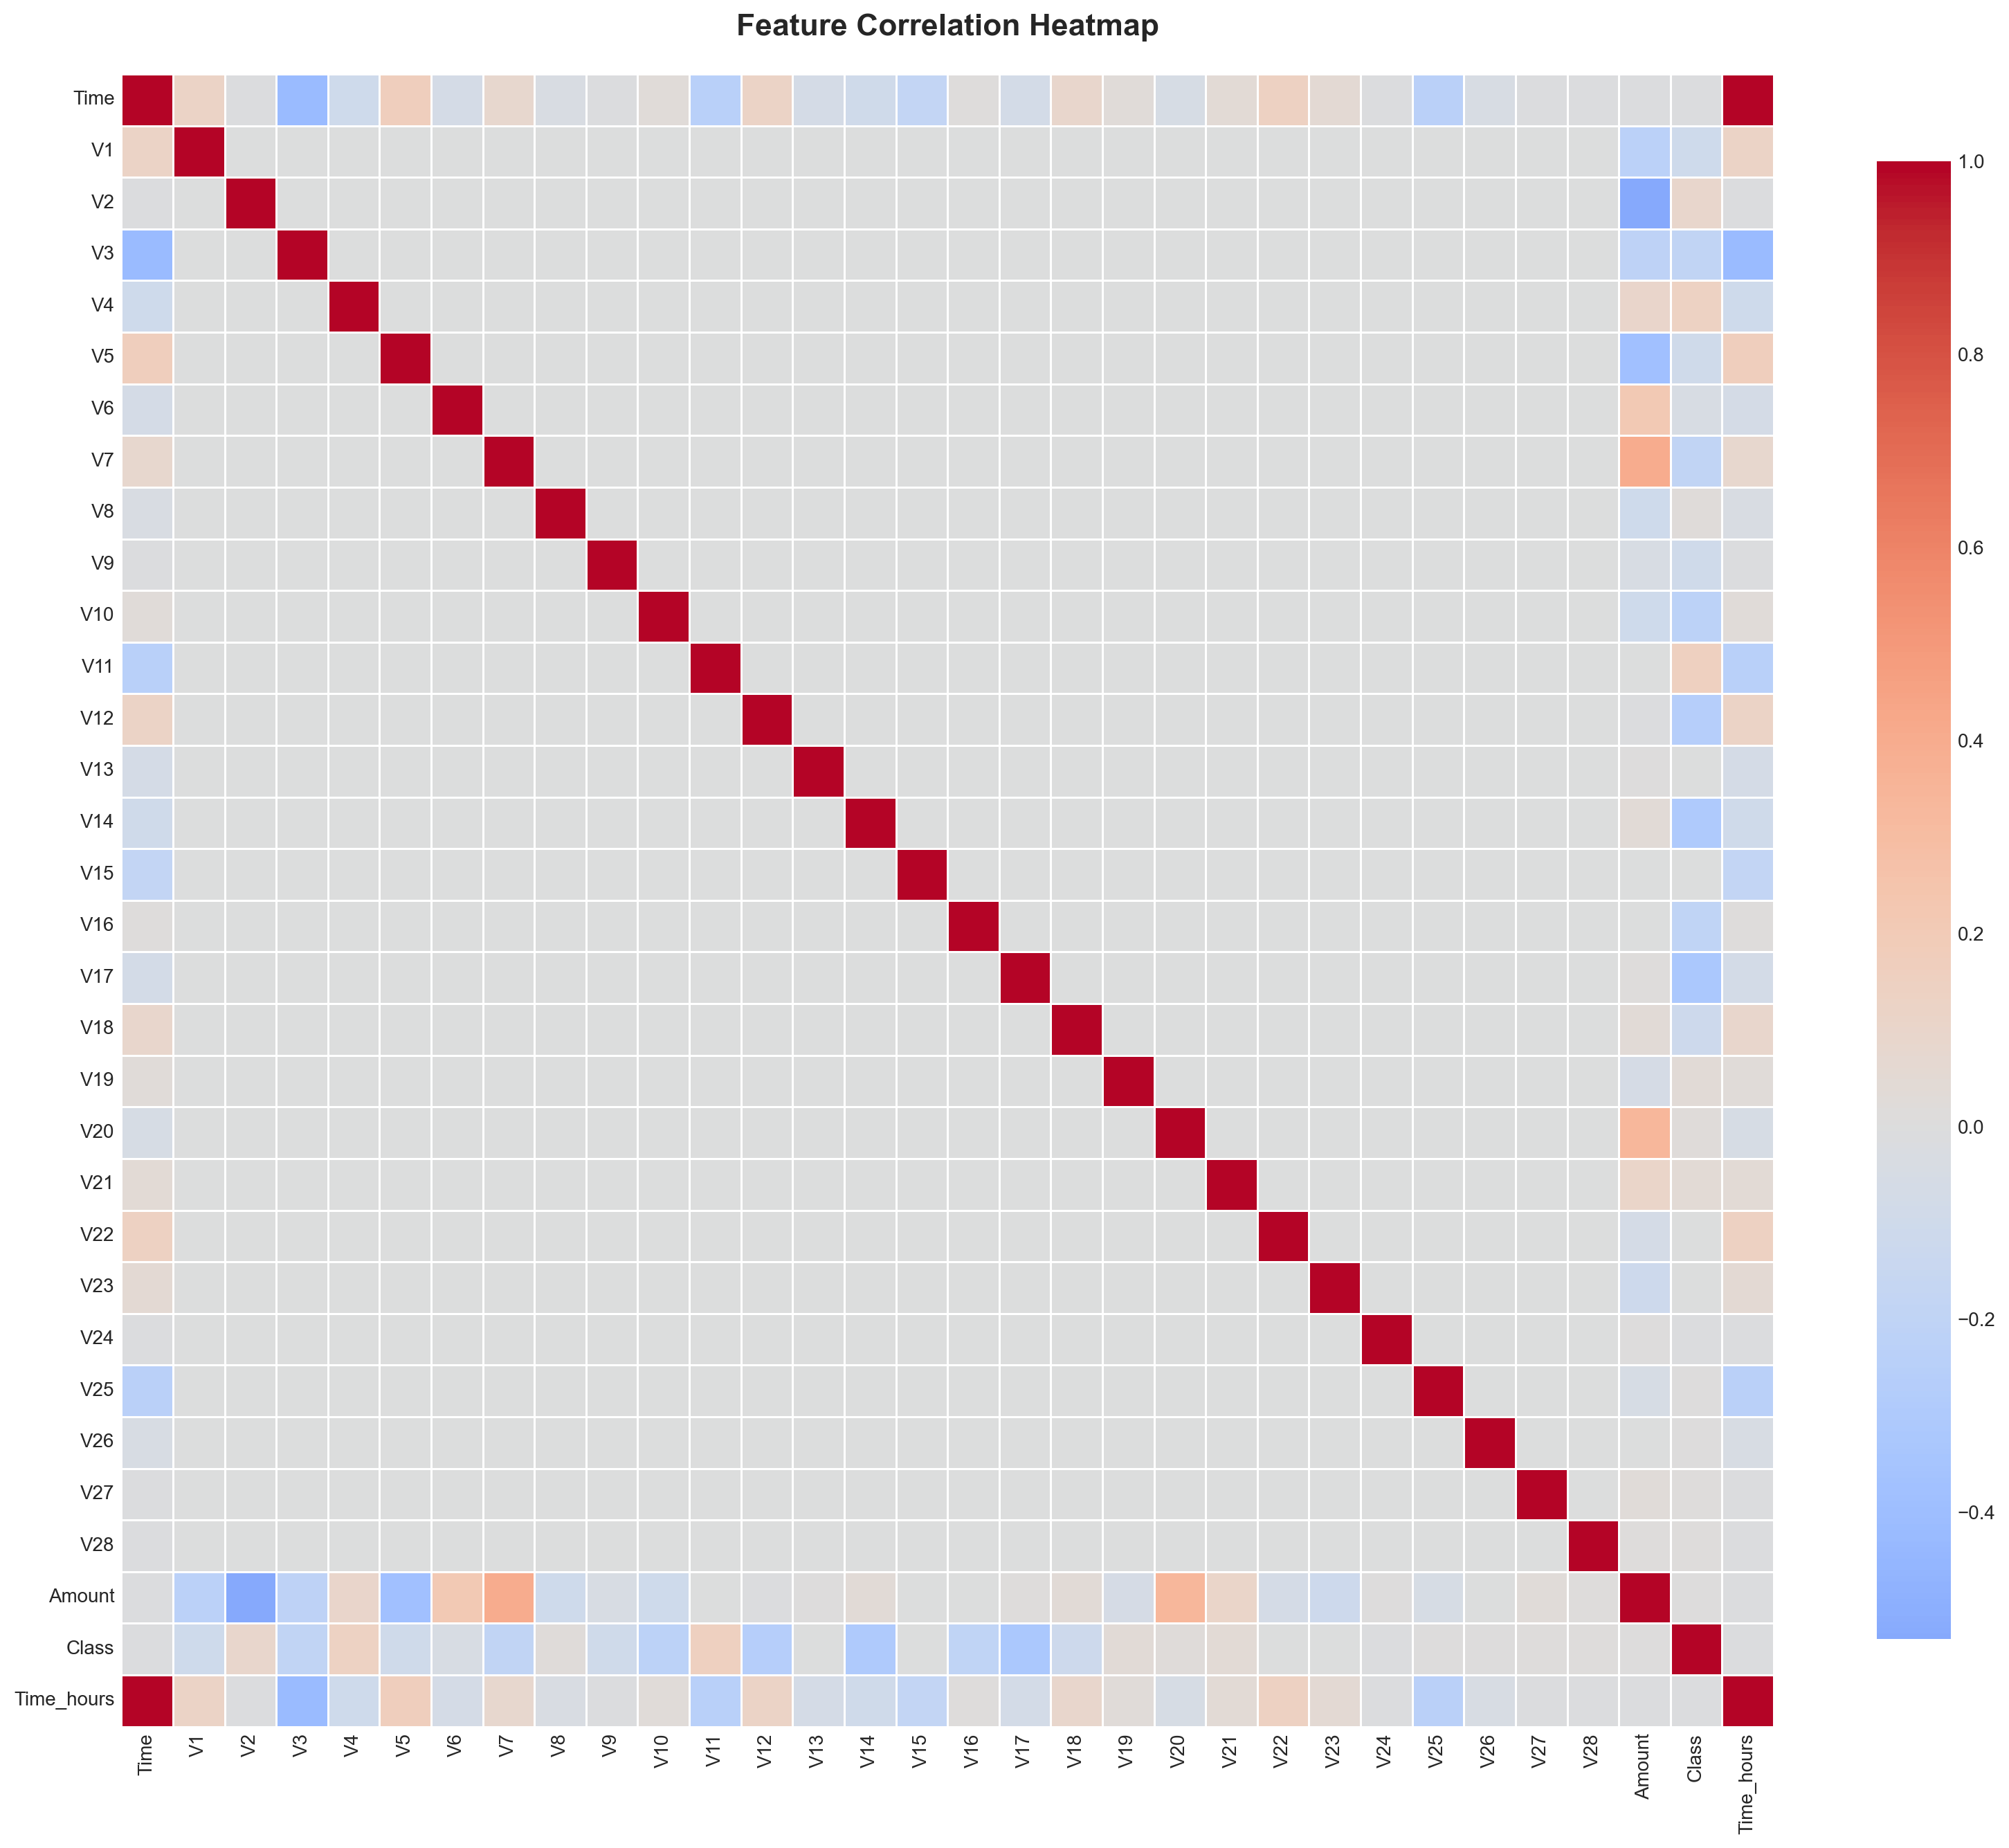

✓ Saved: results/correlation_heatmap_2.png


In [ ]:
# Visualize correlation heatmap
fig, ax = plt.subplots(figsize=(16, 14))

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax,
            annot=False)  # Set to True if you want to see correlation values

ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../results/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: results/correlation_heatmap.png")

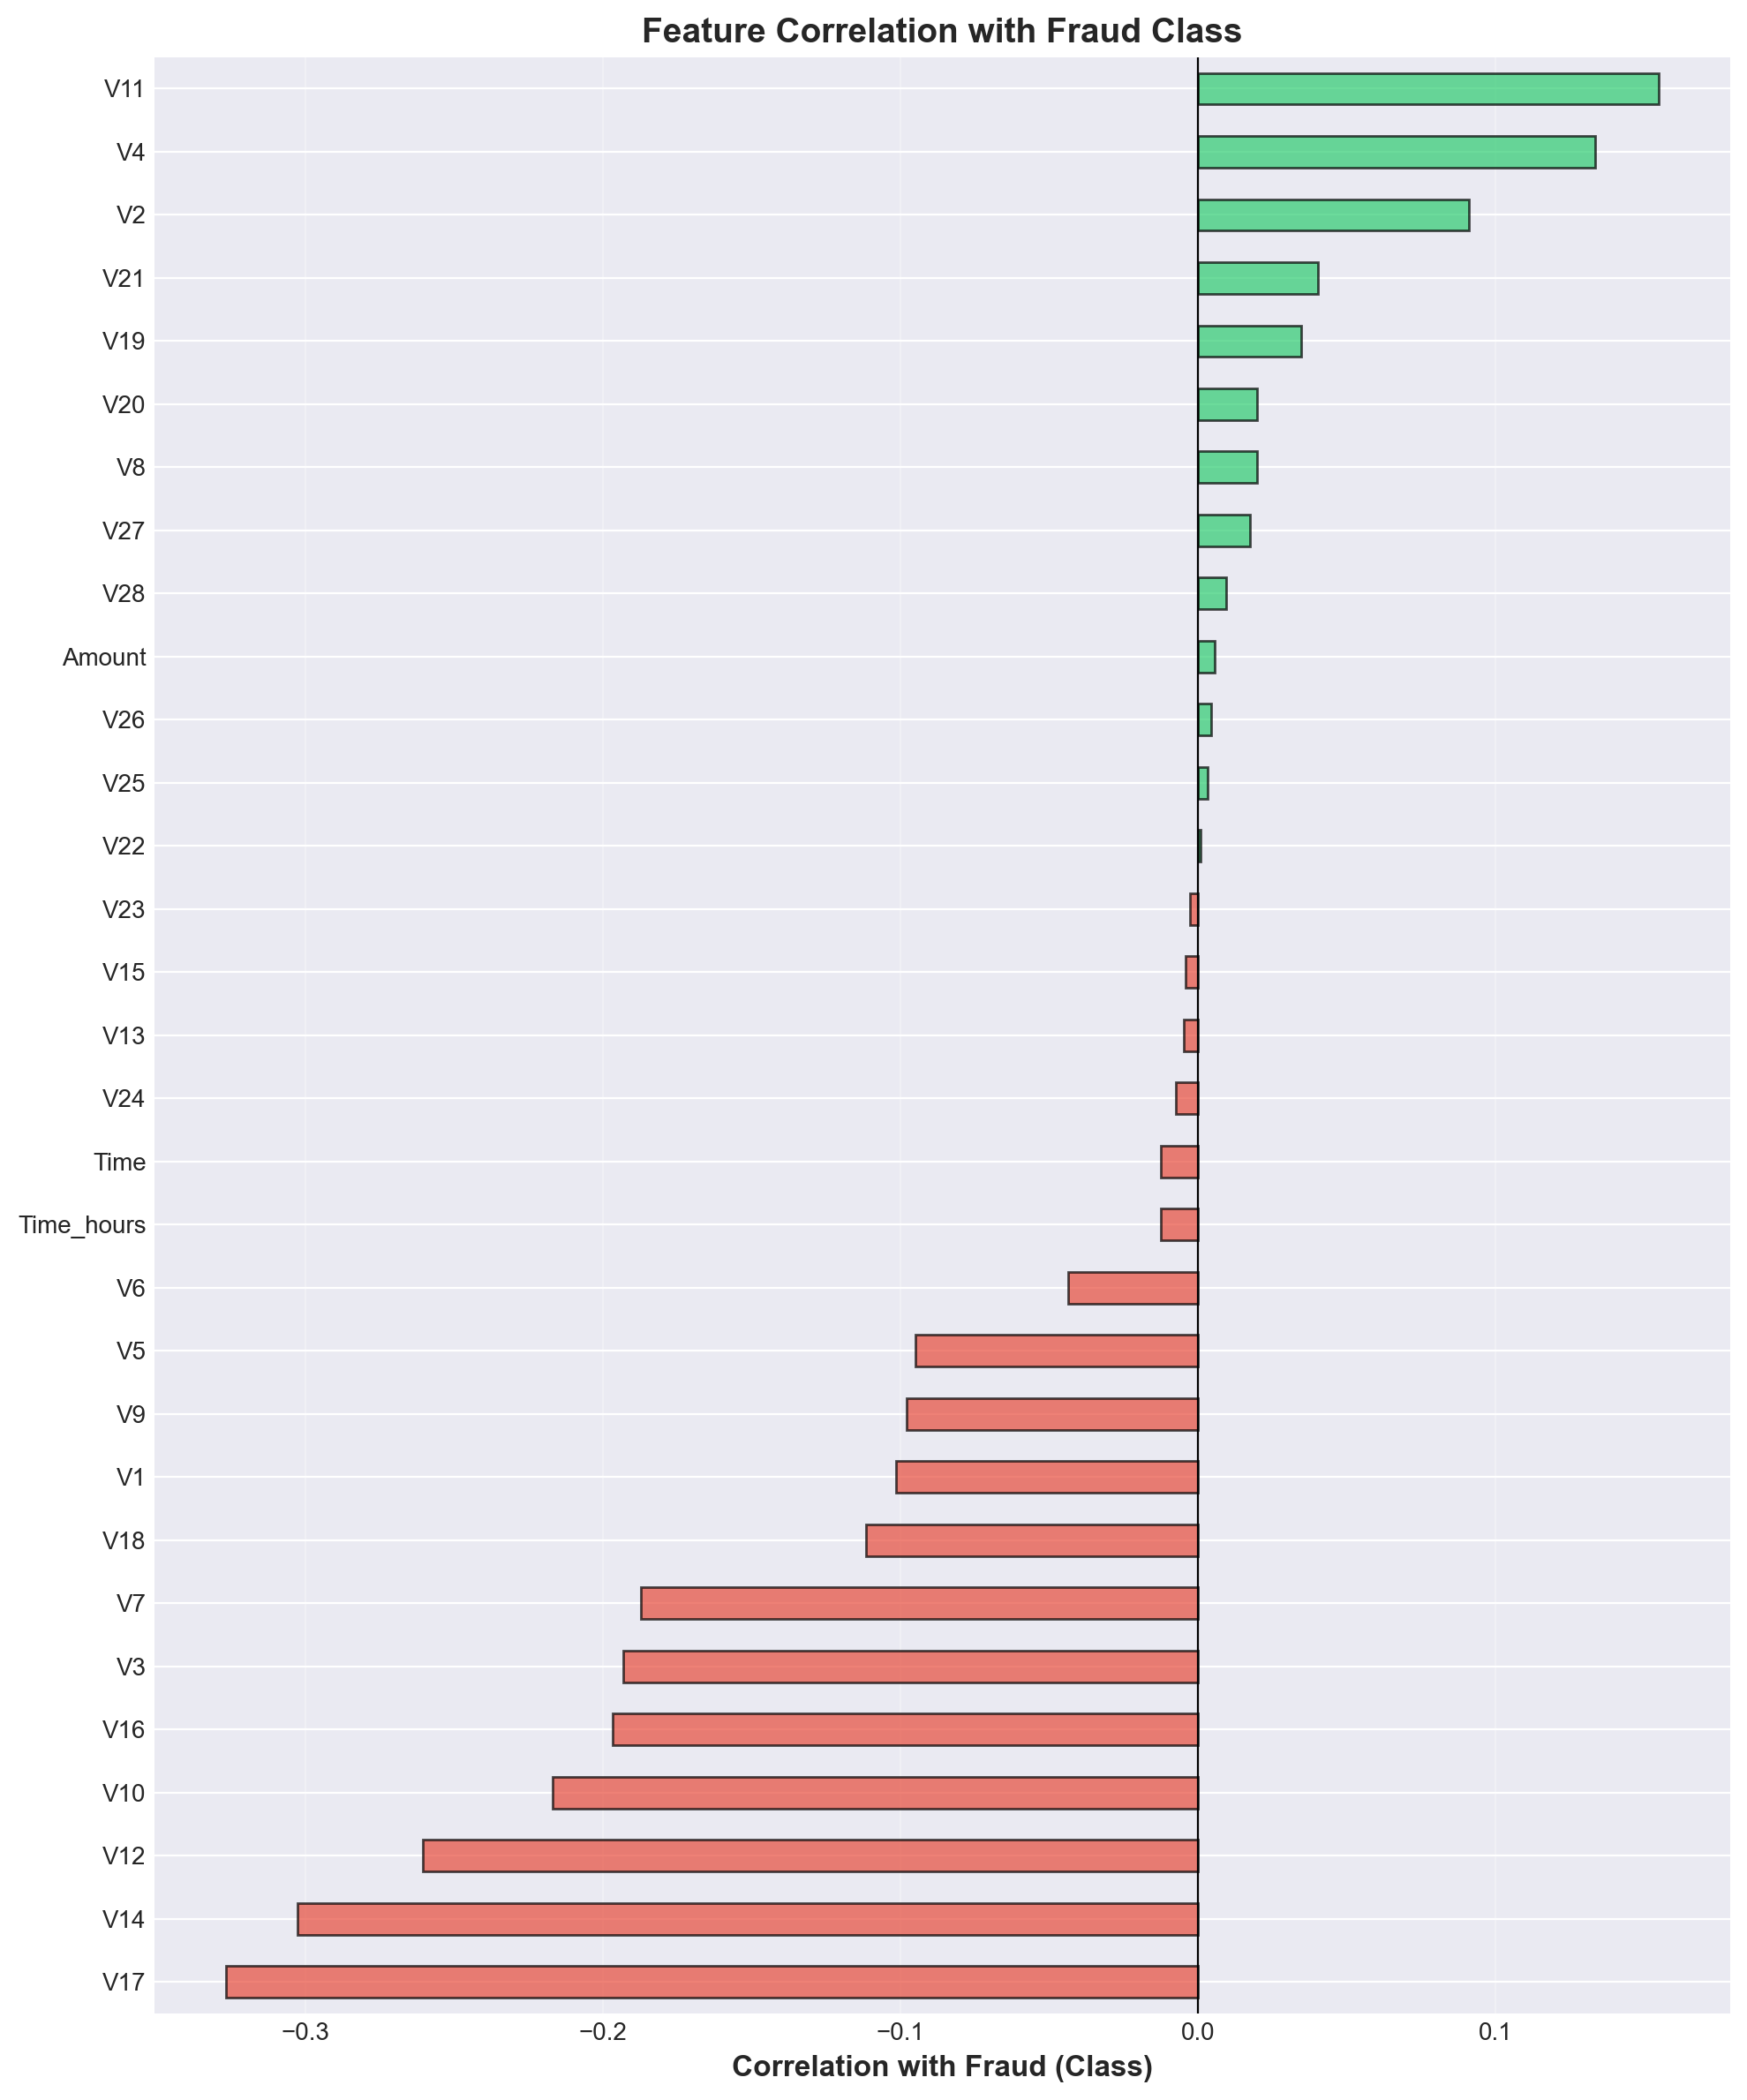

✓ Saved: results/class_correlation_barplot_2.png


In [ ]:
# Visualize correlation with Class variable specifically
fig, ax = plt.subplots(figsize=(10, 12))

# Get correlations with Class and sort
class_corr = df.corr()['Class'].drop('Class').sort_values()

# Create horizontal bar plot
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in class_corr]
class_corr.plot(kind='barh', color=colors, ax=ax, edgecolor='black', alpha=0.7)

ax.set_xlabel('Correlation with Fraud (Class)', fontsize=12, fontweight='bold')
ax.set_title('Feature Correlation with Fraud Class', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../results/class_correlation_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: results/class_correlation_barplot.png")

---
## 7. Key Insights Summary

In [16]:
print("="*70)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*70)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total transactions: {len(df):,}")
print(f"   - Features: {df.shape[1]} (28 PCA components + Time + Amount + Class)")
print(f"   - No missing values ✓")

print("\n2. CLASS IMBALANCE:")
print(f"   - Normal: {class_counts[0]:,} ({100-fraud_percentage:.3f}%)")
print(f"   - Fraud: {class_counts[1]:,} ({fraud_percentage:.3f}%)")
print(f"   - Imbalance ratio: 1:{class_counts[0]/class_counts[1]:.0f}")
print("   - ACTION: Use SMOTE for balancing training data")

print("\n3. AMOUNT ANALYSIS:")
normal_mean = df[df['Class'] == 0]['Amount'].mean()
fraud_mean = df[df['Class'] == 1]['Amount'].mean()
print(f"   - Normal transactions mean: ${normal_mean:.2f}")
print(f"   - Fraud transactions mean: ${fraud_mean:.2f}")
print(f"   - Fraud amounts are {'higher' if fraud_mean > normal_mean else 'lower'} on average")

print("\n4. TIME PATTERNS:")
print(f"   - Dataset spans {df['Time'].max()/3600/24:.1f} days")
print("   - Frauds occur throughout the time period")

print("\n5. FEATURE CORRELATIONS:")
top_pos = correlations.head(6).index.tolist()[1:]  # Exclude Class itself
top_neg = correlations.tail(5).index.tolist()
print(f"   - Top positive correlations: {', '.join(top_pos[:3])}")
print(f"   - Top negative correlations: {', '.join(top_neg[:3])}")

print("\n6. RECOMMENDATIONS FOR MODEL:")
print("   ✓ Use stratified train-test split to preserve class distribution")
print("   ✓ Apply SMOTE to training data for balanced learning")
print("   ✓ Standardize features (Time and Amount need scaling)")
print("   ✓ Use metrics: AUC-ROC, Precision-Recall, F1 (not accuracy!)")
print("   ✓ Consider using class weights in model training")

print("\n" + "="*70)
print("✅ Exploratory Data Analysis Complete!")
print("="*70)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total transactions: 284,807
   - Features: 32 (28 PCA components + Time + Amount + Class)
   - No missing values ✓

2. CLASS IMBALANCE:
   - Normal: 284,315 (99.827%)
   - Fraud: 492 (0.173%)
   - Imbalance ratio: 1:578
   - ACTION: Use SMOTE for balancing training data

3. AMOUNT ANALYSIS:
   - Normal transactions mean: $88.29
   - Fraud transactions mean: $122.21
   - Fraud amounts are higher on average

4. TIME PATTERNS:
   - Dataset spans 2.0 days
   - Frauds occur throughout the time period

5. FEATURE CORRELATIONS:
   - Top positive correlations: V11, V4, V2
   - Top negative correlations: V16, V10, V12

6. RECOMMENDATIONS FOR MODEL:
   ✓ Use stratified train-test split to preserve class distribution
   ✓ Apply SMOTE to training data for balanced learning
   ✓ Standardize features (Time and Amount need scaling)
   ✓ Use metrics: AUC-ROC, Precision-Recall, F1 (not accuracy!)
   ✓ Consider using class weights in

---
## 8. Export Summary Statistics

In [17]:
# Save summary statistics to text file
with open('../results/eda_summary.txt', 'w') as f:
    f.write("CREDIT CARD FRAUD DETECTION - EDA SUMMARY\n")
    f.write("="*70 + "\n\n")
    
    f.write("Dataset Overview:\n")
    f.write(f"Total transactions: {len(df):,}\n")
    f.write(f"Features: {df.shape[1]}\n")
    f.write(f"Normal: {class_counts[0]:,} ({100-fraud_percentage:.3f}%)\n")
    f.write(f"Fraud: {class_counts[1]:,} ({fraud_percentage:.3f}%)\n")
    f.write(f"Imbalance ratio: 1:{class_counts[0]/class_counts[1]:.0f}\n\n")
    
    f.write("Amount Statistics:\n")
    f.write(f"Normal mean: ${normal_mean:.2f}\n")
    f.write(f"Fraud mean: ${fraud_mean:.2f}\n\n")
    
    f.write("Top Correlations with Fraud:\n")
    f.write(str(correlations.head(11)))
    f.write("\n\n")
    f.write(str(correlations.tail(10)))

print("✓ Saved: results/eda_summary.txt")
print("\n✅ All visualizations and summaries saved to results/ directory")

✓ Saved: results/eda_summary.txt

✅ All visualizations and summaries saved to results/ directory


---
## Next Steps

1. ✅ **Data downloaded and explored**
2. 🔄 **Run preprocessing**: `python scripts/preprocess.py`
3. 🚀 **Train model**: Upload `model_training.ipynb` to Google Colab

All visualizations saved in `results/` directory for your case study report!